# Question 8: Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../Data/Headway Data.csv')

In [3]:
weather = pd.read_csv('../Data/bna_weather.csv')

stripped hour from data column to merge the two datasets

In [4]:
headway['NEW_DATE']=headway.DATE
headway['NEW_DATE']= pd.to_datetime(headway.NEW_DATE)
headway['HOUR']=headway.SCHEDULED_TIME.str.slice(0,2).astype(str)

In [5]:
weather['HOUR']=weather.Date.str.slice(11,13).astype(str)
weather['NEW_DATE']=weather.Date.str.slice(0,10).astype(str)
weather['NEW_DATE']= pd.to_datetime(weather.NEW_DATE)

In [6]:
merge_df = headway.merge(weather, on=['NEW_DATE','HOUR'], how= "left")

In [7]:
merge_df = merge_df.drop_duplicates(['ADHERENCE_ID'])

In [8]:
merge_df['DEV_PERCENT'] = merge_df.HDWY_DEV/merge_df.SCHEDULED_HDWY * 100
df_drop = merge_df.dropna(subset=['DEV_PERCENT'])

In [9]:
def BUNCH_GAP(value):
    if value >= 50:
        return "Gapped"
    elif value <= -50:
        return "Bunched" 
    else:
        return "On Time"

df_drop['BUNCH_GAP'] = df_drop['DEV_PERCENT'].map(BUNCH_GAP)


C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_15940\589286866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['BUNCH_GAP'] = df_drop['DEV_PERCENT'].map(BUNCH_GAP)


In [10]:
# totals after dropping null values from DEV_PERCENT column 

df_drop['BUNCH_GAP'].value_counts(dropna=False)

On Time    1350769
Gapped       86564
Bunched      70014
Name: BUNCH_GAP, dtype: int64

In [11]:
# percentages after dropping null values 

df_drop['BUNCH_GAP'].value_counts(normalize=True)

On Time    0.896123
Gapped     0.057428
Bunched    0.046448
Name: BUNCH_GAP, dtype: float64

made a dataframe with just rain


In [12]:
raining = df_drop.loc[df_drop['precip_hrly'] >0]    

In [13]:
# wanted to look at freezing rain

raining.loc[raining['temp'] >32, 'FREEZING_NOT_FREEZING']= 'Above Freezing'
raining.loc[raining['temp'] <=32, 'FREEZING_NOT_FREEZING']= 'At or Below Freezing'

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_15940\2239112140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raining.loc[raining['temp'] >32, 'FREEZING_NOT_FREEZING']= 'Above Freezing'


In [14]:
raining['FREEZING_NOT_FREEZING'].value_counts()

Above Freezing          67865
At or Below Freezing     2291
Name: FREEZING_NOT_FREEZING, dtype: int64

In [15]:
raining['BUNCH_GAP'].value_counts()

On Time    62785
Gapped      4203
Bunched     3168
Name: BUNCH_GAP, dtype: int64

In [35]:
# Dropping nulls in dev_percent column

# On Time    1350769
# Gapped       86564
# Bunched      70014

# Dropping nulls in scheduled headway column:

# On Time    1392843
# Gapped       86564
# Bunched      70014

# On Time    1350769
# Gapped       86564
# Bunched      70014

# Without dropping nulls:

# On Time    1825137
# Gapped       86564
# Bunched      70014


In [16]:
grouped_df = raining.groupby(['FREEZING_NOT_FREEZING', 'BUNCH_GAP']).count()
grouped_df

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID  \
FREEZING_NOT_FREEZING BUNCH_GAP                                            
Above Freezing        Bunched           2924          2924          2924   
                      Gapped            3819          3819          3819   
                      On Time          61122         61122         61122   
At or Below Freezing  Bunched            244           244           244   
                      Gapped             384           384           384   
                      On Time           1663          1663          1663   

                                  DATE  ROUTE_ABBR  BLOCK_ABBR  OPERATOR  \
FREEZING_NOT_FREEZING BUNCH_GAP                                            
Above Freezing        Bunched     2924        2924        2924      2924   
                      Gapped      3819        3819        3819      3819   
                      On Time    61122       61122       61122     61122   
At or Below Freezing  Bunched      244         244         244       244   
                      Gapped       384         384         384       384   
                      On Time     1663        1663        1663      1663   

                                 TRIP_ID  OVERLOAD_ID  ROUTE_DIRECTION_NAME  \
FREEZING_NOT_FREEZING BUNCH_GAP                                               
Above Freezing        Bunched       2924         2924                  2924   
                      Gapped        3819         3819                  3819   
                      On Time      61122        61122                 61122   
At or Below Freezing  Bunched        244          244                   244   
                      Gapped         384          384                   384   
                      On Time       1663         1663                  1663   

                                 ...  water_temp  primary_wave_period  \
FREEZING_NOT_FREEZING BUNCH_GAP  ...                                    
Above Freezing        Bunched    ...           0                    0   
                      Gapped     ...           0                    0   
                      On Time    ...           0                    0   
At or Below Freezing  Bunched    ...           0                    0   
                      Gapped     ...           0                    0   
                      On Time    ...           0                    0   

                                 primary_wave_height  primary_swell_period  \
FREEZING_NOT_FREEZING BUNCH_GAP                                              
Above Freezing        Bunched                      0                     0   
                      Gapped                       0                     0   
                      On Time                      0                     0   
At or Below Freezing  Bunched                      0                     0   
                      Gapped                       0                     0   
                      On Time                      0                     0   

                                 primary_swell_height  \
FREEZING_NOT_FREEZING BUNCH_GAP                         
Above Freezing        Bunched                       0   
                      Gapped                        0   
                      On Time                       0   
At or Below Freezing  Bunched                       0   
                      Gapped                        0   
                      On Time                       0   

                                 primary_swell_direction  \
FREEZING_NOT_FREEZING BUNCH_GAP                            
Above Freezing        Bunched                          0   
                      Gapped                           0   
                      On Time                          0   
At or Below Freezing  Bunched                          0   
                      Gapped                           0   
                      On Time                          0   

                                 s

In [17]:
index_grouped=grouped_df.reset_index()
index_grouped

,FREEZING_NOT_FREEZING,BUNCH_GAP,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,...,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,DEV_PERCENT
0,Above Freezing,Bunched,2924,2924,2924,2924,2924,2924,2924,2924,...,0,0,0,0,0,0,0,0,0,2924
1,Above Freezing,Gapped,3819,3819,3819,3819,3819,3819,3819,3819,...,0,0,0,0,0,0,0,0,0,3819
2,Above Freezing,On Time,61122,61122,61122,61122,61122,61122,61122,61122,...,0,0,0,0,0,0,0,0,0,61122
3,At or Below Freezing,Bunched,244,244,244,244,244,244,244,244,...,0,0,0,0,0,0,0,0,0,244
4,At or Below Freezing,Gapped,384,384,384,384,384,384,384,384,...,0,0,0,0,0,0,0,0,0,384
5,At or Below Freezing,On Time,1663,1663,1663,1663,1663,1663,1663,1663,...,0,0,0,0,0,0,0,0,0,1663


In [23]:
# kayla's code for converting to percentages:
#percent_test = combined_df.groupby(['IS_RAINING', 'GAPPED_OR_BUNCHED']).agg({'TRIP_ID':'count'})
# rain_vs_norain = percent_test.groupby(level=0).apply(lambda x: 
#                                                    100* xfloat(x.sum()))

In [21]:
percent_test = raining.groupby(['FREEZING_NOT_FREEZING', 'BUNCH_GAP']).agg({'TRIP_ID': 'count'})
percent_test

TRIP_ID
FREEZING_NOT_FREEZING BUNCH_GAP         
Above Freezing        Bunched       2924
                      Gapped        3819
                      On Time      61122
At or Below Freezing  Bunched        244
                      Gapped         384
                      On Time       1663

In [22]:
freezing_vs_notfreezing = percent_test.groupby(level=0).apply(lambda x: 
                                                    100* x/float(x.sum())).round(decimals=2)
freezing_vs_notfreezing

TRIP_ID
FREEZING_NOT_FREEZING BUNCH_GAP         
Above Freezing        Bunched       4.31
                      Gapped        5.63
                      On Time      90.06
At or Below Freezing  Bunched      10.65
                      Gapped       16.76
                      On Time      72.59

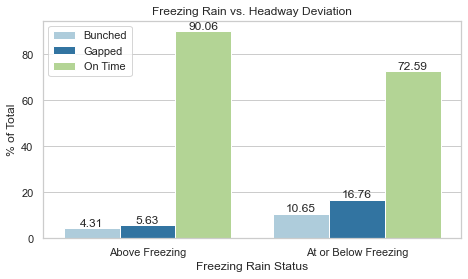

In [25]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(7.5,4))
p = sns.barplot(x='FREEZING_NOT_FREEZING',
            y='TRIP_ID',
            hue= 'BUNCH_GAP',
             palette='Paired',    
            data = freezing_vs_notfreezing.reset_index())
for i in p.containers:
     p.bar_label(i,)
plt.xlabel('Freezing Rain Status')
plt.ylabel('% of Total')
plt.title('Freezing Rain vs. Headway Deviation')
plt.gca().legend().set_title('')

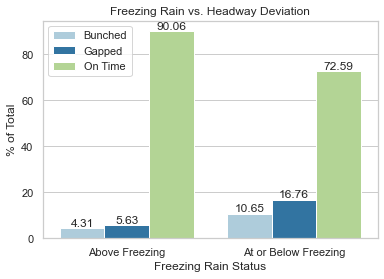

In [26]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(6,4))
p = sns.barplot(x='FREEZING_NOT_FREEZING',
            y='TRIP_ID',
            hue= 'BUNCH_GAP',
             palette='Paired',    
            data = freezing_vs_notfreezing.reset_index())
for i in p.containers:
     p.bar_label(i,)
plt.xlabel('Freezing Rain Status')
plt.ylabel('% of Total')
plt.title('Freezing Rain vs. Headway Deviation')
plt.gca().legend().set_title('')

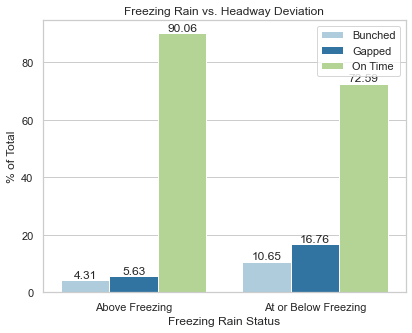

In [29]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(6.5,5))
p = sns.barplot(x='FREEZING_NOT_FREEZING',
            y='TRIP_ID',
            hue= 'BUNCH_GAP',
             palette='Paired',    
            data = freezing_vs_notfreezing.reset_index())
for i in p.containers:
     p.bar_label(i,)
plt.xlabel('Freezing Rain Status')
plt.ylabel('% of Total')
plt.title('Freezing Rain vs. Headway Deviation')
plt.gca().legend().set_title('')

The Official WeGo Style Guide of Styles
Chart palette should be 'Paired' (seaborn palette code = 'Paired')
Standard font
Follow normal capitalization rules for chart labels
Make sure charts used for comparisons have uniform axiis (ie. charts dealing with percentages should be 0-100)
Order labels appropriately  (months, days, time, etc). Weekdays should be in order starting with Monday
Color Congruency (if a year or route is one color in one slide, it should be the same color in another slide)
When adding charts to slides, be sure that they don't appear to be stretched. (Shift+Click when resizing, or set size in Jupyter Notebook)
Google slide deck to add your slides here:
https://docs.google.com/presentation/d/1amjAIDhoRR63oJNMUm9oM2Uf799NaOMkCXslJ8nAex0/edit?usp=sharing (edited) 